## Exercise 1

In [1]:
from scipy.stats import beta,norm
import numpy as np
import matplotlib.pyplot as plt
def kernel_density_estimator(x,data,h=None):
    n = np.size(data)
    def bandwidth(data,n):
        σ = np.std(data,ddof=1)
        return (4*σ**5/(3*n))**(1/5)
    
    h = bandwidth(data,n)
    return np.sum(norm.pdf((x-data)/h))/(h*n)
    

In [2]:
def plot_density(α,β,n=100):
    data = beta.rvs(a=α,b=β,size=n)
    xmax = min(1,np.max(data)+0.1)
    xmin = max(0,np.min(data)-0.1)
    xgrid = np.linspace(xmin,xmax,200)

    kde = []
    real_density = beta.pdf(xgrid,a=α,b=β)
    for x in xgrid:
        kde.append(kernel_density_estimator(x,data))
    fig,ax = plt.subplots()
    ax.plot(xgrid,kde,'b-',label='kde')
    ax.plot(xgrid,real_density,'r--',label='real density')
    ax.legend(loc='upper right')
    plt.show()

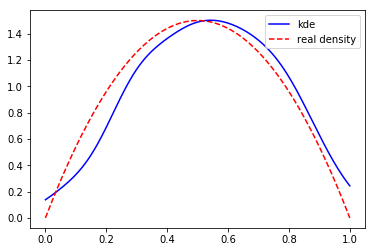

In [3]:
plot_density(2,2)

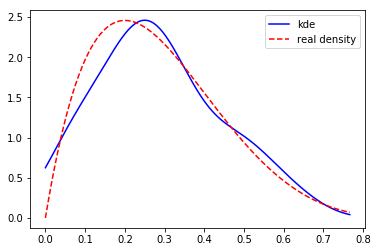

In [4]:
plot_density(2,5)

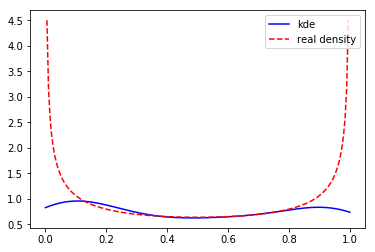

In [5]:
plot_density(0.5,0.5)

### conclusion
In the first two cases, kernel density estimator greatly fits real density.   
However, when we put $\alpha$ and $\beta$ to 0.5, this estimator seems to perform poorly.

## Exercise 2

In [6]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

plot $\psi_t$ and $\psi_{t+1}$ using the true distributions:

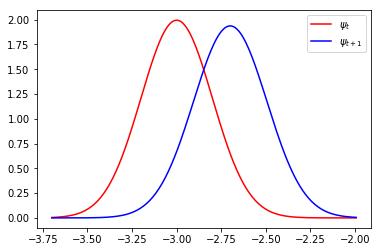

In [7]:
ρ = 0.9
b  = 0.0
σ = 0.1
μ = -3.0
s  = 0.2

def plot_1(ρ,b,σ,μ,s):
    mu_1 = μ
    sigma_1 = s
    mu_2 = ρ*μ+b
    sigma_2 = np.sqrt(ρ**2*s**2+σ**2)

    xmin = min(mu_1-sigma_1,mu_2-sigma_2)-0.5
    xmax = max(mu_1+sigma_1,mu_2+sigma_2)+0.5
    xgrid = np.linspace(xmin,xmax,200)
    psi_t = norm.pdf(xgrid,loc=mu_1,scale=sigma_1)
    psi_tplus1 = norm.pdf(xgrid,loc=mu_2,scale=sigma_2)
    fig,ax = plt.subplots()
    ax.plot(xgrid,psi_t,'r-',label='$\psi_t$')
    ax.plot(xgrid,psi_tplus1,'b-',label='$\psi_{t+1}$')
    ax.legend(loc='best')
    plt.show()
    
plot_1(ρ,b,σ,μ,s)

In [8]:
def plot_2(ρ,b,σ,μ,s,n):
    mu_1 = μ
    sigma_1 = s
    mu_2 = ρ*μ+b
    sigma_2 = np.sqrt(ρ**2*s**2+σ**2)
    xmin = min(mu_1-sigma_1,mu_2-sigma_2)-0.5
    xmax = max(mu_1+sigma_1,mu_2+sigma_2)+0.5
    xgrid = np.linspace(xmin,xmax,200)
    
    psi_tplus1 = norm.pdf(xgrid,loc=mu_2,scale=sigma_2)
    
    xt = norm.rvs(loc=μ,scale=s,size=n)
    xtplus1 = []
    for x in xt:
        ξ = norm.rvs(loc=0,scale=1,size=1)
        xtplus1.append(ρ*x+b+σ*ξ)
    kde = []
    for x in xgrid:
        kde.append(kernel_density_estimator(x,xtplus1))
    fig,ax = plt.subplots()
    ax.plot(xgrid,kde,'b-',label='kde')
    ax.plot(xgrid,psi_tplus1,'r--',label='real density')
    ax.legend(loc='upper right')
    plt.show()

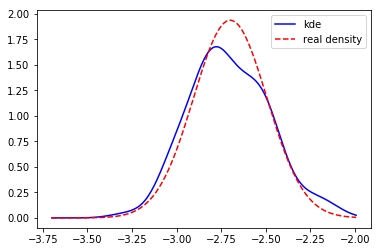

In [9]:
plot_2(ρ,b,σ,μ,s,100)

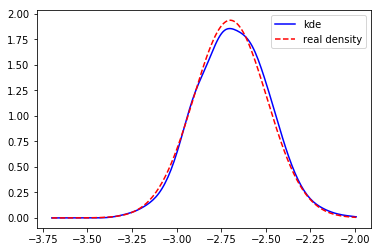

In [10]:
plot_2(ρ,b,σ,μ,s,500)

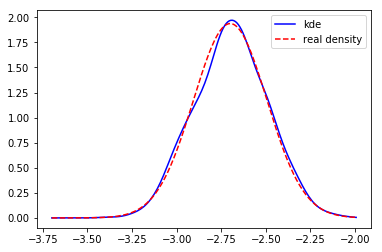

In [11]:
plot_2(ρ,b,σ,μ,s,1000)

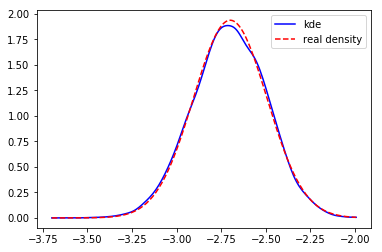

In [12]:
plot_2(ρ,b,σ,μ,s,5000)

### Conclusion
When n increases, the simulation based estimate of $\psi_{t+1}$ does converge to the theoretical distribution.